## Import the dataset


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [120]:
df = pd.read_csv("changeddataset.csv")

In [121]:
df.drop('Unnamed: 0',axis = 1, inplace = True)


In [122]:
df

,Gender,TravelMethod,TravelTime,PartTimeJob,Relationship,Father's_education,Mother's_education,StudyHours,AttendenceLecs,Concentrate,Friends,SocialMediaTime,extra curricular,StudyPattern,Rate yourself,Marks
0,1,1,3,0,0,1,1,2,1,1,1,3,1,1,1,80 to 89
1,1,0,3,0,1,1,2,3,1,1,1,2,1,1,1,80 to 89
2,1,1,4,0,0,3,2,2,2,1,0,3,0,2,3,60 to 69
3,1,0,3,0,1,1,2,4,1,1,1,2,1,1,1,80 to 89
4,1,1,2,0,0,2,1,2,2,1,0,4,0,2,2,70 to 79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0,0,1,0,0,1,2,1,2,1,1,3,0,2,1,90 to 100
374,1,1,4,1,1,1,2,4,2,1,1,1,1,1,1,90 to 100
375,1,1,3,0,0,2,2,3,2,1,1,2,1,1,1,90 to 100
376,1,0,1,1,1,2,2,2,1,1,1,2,1,1,1,90 to 100


In [123]:
df.shape

(378, 16)

In [124]:
df.count()

Gender                378
TravelMethod          378
TravelTime            378
PartTimeJob           378
Relationship          378
Father's_education    378
Mother's_education    378
StudyHours            378
AttendenceLecs        378
Concentrate           378
Friends               378
SocialMediaTime       378
extra curricular      378
StudyPattern          378
Rate yourself         378
Marks                 378
dtype: int64

In [125]:
#No null values where discovered
df.isnull().sum()

Gender                0
TravelMethod          0
TravelTime            0
PartTimeJob           0
Relationship          0
Father's_education    0
Mother's_education    0
StudyHours            0
AttendenceLecs        0
Concentrate           0
Friends               0
SocialMediaTime       0
extra curricular      0
StudyPattern          0
Rate yourself         0
Marks                 0
dtype: int64

## Visualization

In [126]:
df["Marks"].value_counts()

Fail         126
80 to 89      42
60 to 69      42
70 to 79      42
90 to 100     42
50 to 59      42
40 to 49      42
Name: Marks, dtype: int64

<AxesSubplot:>

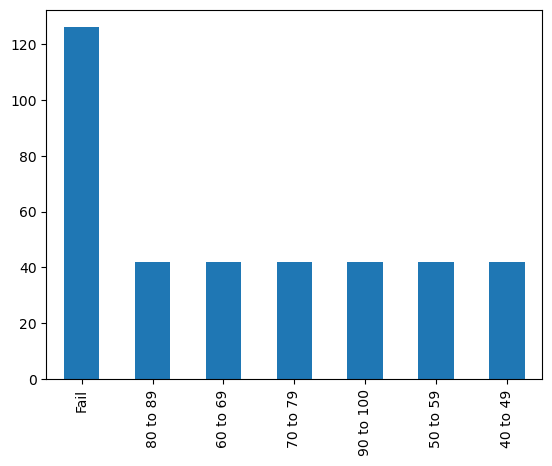

In [127]:
df["Marks"].value_counts().plot.bar()

In [128]:
df.iloc[:,1:].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TravelMethod,378.0,0.544974,0.498633,0.0,0.0,1.0,1.0,1.0
TravelTime,378.0,2.883598,1.071549,1.0,2.0,3.0,4.0,4.0
PartTimeJob,378.0,0.431217,0.495903,0.0,0.0,0.0,1.0,1.0
Relationship,378.0,0.417989,0.493882,0.0,0.0,0.0,1.0,1.0
Father's_education,378.0,1.563492,0.593904,1.0,1.0,2.0,2.0,3.0
Mother's_education,378.0,1.798942,0.676862,1.0,1.0,2.0,2.0,3.0
StudyHours,378.0,2.272487,1.120030,1.0,1.0,2.0,3.0,5.0
AttendenceLecs,378.0,1.542328,0.573099,1.0,1.0,2.0,2.0,3.0
Concentrate,378.0,1.296296,0.561390,1.0,1.0,1.0,1.0,3.0
Friends,378.0,0.597884,0.490975,0.0,0.0,1.0,1.0,1.0


<AxesSubplot:>

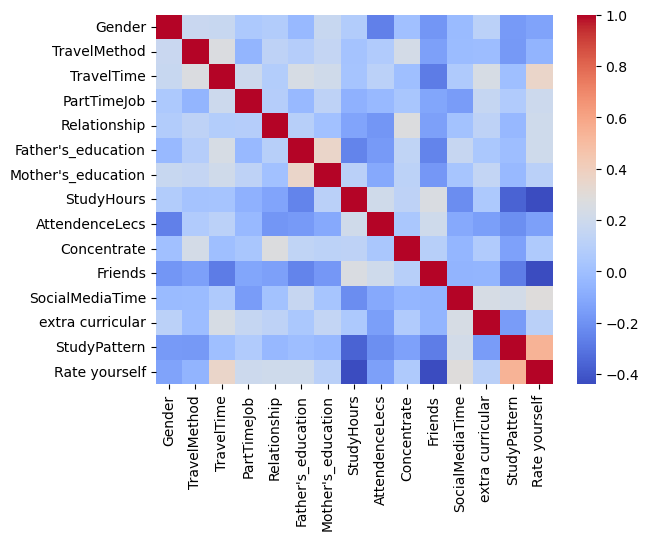

In [129]:
import seaborn as sns

sns.heatmap(df.corr(),cmap = 'coolwarm')

## SMOTE

In [130]:
X = df.drop("Marks",axis = 1)
y = df["Marks"]

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , y , test_size = 0.3)

X_train.shape, X_test.shape

((264, 15), (114, 15))

In [132]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)


<AxesSubplot:>

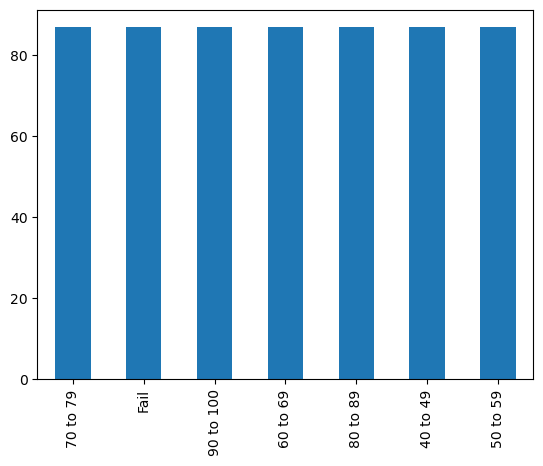

In [133]:
y_train_smote.value_counts().plot.bar()

In [134]:
from collections import Counter
print("Before SMOTE:", Counter(y_train))
print("\n")
print("After SMOTE: ", Counter(y_train_smote))

Before SMOTE: Counter({'Fail': 87, '50 to 59': 33, '70 to 79': 31, '90 to 100': 30, '60 to 69': 30, '40 to 49': 27, '80 to 89': 26})


After SMOTE:  Counter({'70 to 79': 87, 'Fail': 87, '90 to 100': 87, '60 to 69': 87, '80 to 89': 87, '40 to 49': 87, '50 to 59': 87})


In [135]:
X_train_smote.shape

(609, 15)

## Decision Tree Classifier

In [136]:
from sklearn.tree import DecisionTreeClassifier

decisionModel = DecisionTreeClassifier()
decisionModel.fit(X_train_smote,y_train_smote)

decisionPred = decisionModel.predict(X_test)

decisionPred

array(['50 to 59', 'Fail', 'Fail', 'Fail', 'Fail', '90 to 100',
       '60 to 69', '90 to 100', 'Fail', '60 to 69', '40 to 49', 'Fail',
       '60 to 69', '90 to 100', '50 to 59', 'Fail', 'Fail', 'Fail',
       '90 to 100', '90 to 100', '50 to 59', '40 to 49', '60 to 69',
       'Fail', 'Fail', 'Fail', '70 to 79', 'Fail', 'Fail', '50 to 59',
       '90 to 100', '60 to 69', '60 to 69', '60 to 69', '50 to 59',
       '40 to 49', '40 to 49', '40 to 49', '40 to 49', '80 to 89',
       '60 to 69', '70 to 79', '40 to 49', 'Fail', '50 to 59', '50 to 59',
       'Fail', '80 to 89', '40 to 49', 'Fail', '90 to 100', 'Fail',
       '70 to 79', 'Fail', 'Fail', 'Fail', '70 to 79', '70 to 79',
       '90 to 100', 'Fail', '40 to 49', '90 to 100', 'Fail', '80 to 89',
       'Fail', '60 to 69', '90 to 100', '60 to 69', 'Fail', '70 to 79',
       'Fail', '60 to 69', '60 to 69', '50 to 59', 'Fail', '60 to 69',
       '80 to 89', '60 to 69', '60 to 69', 'Fail', '60 to 69', '40 to 49',
       '60 to 69', '

In [137]:
#Accuracy of decision tree model
accuracy_score(y_test,decisionPred)

0.7982456140350878

In [138]:
pd.crosstab(y_test,decisionPred)

col_0,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100,Fail
Marks,,,,,,,
40 to 49,15,0,0,0,0,0,0
50 to 59,0,9,0,0,0,0,0
60 to 69,0,0,11,1,0,0,0
70 to 79,0,0,6,3,2,0,0
80 to 89,2,1,4,4,2,3,0
90 to 100,0,0,0,0,0,12,0
Fail,0,0,0,0,0,0,39


## Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier

randForestModel = RandomForestClassifier()
randForestModel.fit(X_train_smote, y_train_smote)

randForestPred = randForestModel.predict(X_test)
randForestPred

array(['70 to 79', 'Fail', 'Fail', 'Fail', 'Fail', '90 to 100',
       '60 to 69', '90 to 100', 'Fail', '70 to 79', '40 to 49', 'Fail',
       '60 to 69', '90 to 100', '50 to 59', 'Fail', 'Fail', 'Fail',
       '90 to 100', '90 to 100', '50 to 59', '40 to 49', '70 to 79',
       'Fail', 'Fail', 'Fail', '70 to 79', 'Fail', 'Fail', '50 to 59',
       '90 to 100', '70 to 79', '60 to 69', '70 to 79', '50 to 59',
       '40 to 49', '40 to 49', '40 to 49', '40 to 49', '60 to 69',
       '60 to 69', '70 to 79', '40 to 49', 'Fail', '50 to 59', '50 to 59',
       'Fail', '70 to 79', '40 to 49', 'Fail', '90 to 100', 'Fail',
       '60 to 69', 'Fail', 'Fail', 'Fail', 'Fail', '70 to 79',
       '90 to 100', 'Fail', '40 to 49', '90 to 100', 'Fail', '70 to 79',
       'Fail', '60 to 69', '90 to 100', '60 to 69', 'Fail', '70 to 79',
       'Fail', '60 to 69', '60 to 69', '50 to 59', 'Fail', '60 to 69',
       '80 to 89', '70 to 79', '70 to 79', 'Fail', '70 to 79', '40 to 49',
       '60 to 69', '60 t

In [140]:
#Accuracy of decision tree model
accuracy_score(y_test,randForestPred)

0.8245614035087719

In [141]:
pd.crosstab(y_test,randForestPred)

col_0,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100,Fail
Marks,,,,,,,
40 to 49,15,0,0,0,0,0,0
50 to 59,0,9,0,0,0,0,0
60 to 69,0,0,10,1,0,0,1
70 to 79,0,0,2,8,1,0,0
80 to 89,2,0,2,9,1,2,0
90 to 100,0,0,0,0,0,12,0
Fail,0,0,0,0,0,0,39


## Support vector machine Classifier

In [142]:
from sklearn import svm

svm_model= svm.SVC(decision_function_shape='ovo')
svm_model.fit(X_train_smote, y_train_smote)

svm_pred = svm_model.predict(X_test)
svm_pred

array(['70 to 79', 'Fail', 'Fail', 'Fail', 'Fail', '90 to 100',
       '60 to 69', '90 to 100', 'Fail', '70 to 79', '40 to 49', 'Fail',
       '80 to 89', '90 to 100', '50 to 59', 'Fail', 'Fail', '40 to 49',
       '90 to 100', '90 to 100', '50 to 59', '40 to 49', '70 to 79',
       'Fail', 'Fail', 'Fail', '70 to 79', 'Fail', 'Fail', '50 to 59',
       '90 to 100', '70 to 79', '60 to 69', '70 to 79', '50 to 59',
       '40 to 49', '40 to 49', '40 to 49', '60 to 69', '60 to 69',
       '50 to 59', '70 to 79', '40 to 49', 'Fail', '50 to 59', '50 to 59',
       'Fail', '70 to 79', '40 to 49', 'Fail', '90 to 100', 'Fail',
       '60 to 69', 'Fail', 'Fail', 'Fail', 'Fail', '70 to 79',
       '90 to 100', 'Fail', '40 to 49', '90 to 100', 'Fail', '60 to 69',
       'Fail', '60 to 69', '90 to 100', '60 to 69', 'Fail', '70 to 79',
       'Fail', '50 to 59', '60 to 69', '50 to 59', 'Fail', '60 to 69',
       '80 to 89', '70 to 79', '70 to 79', 'Fail', '80 to 89', '40 to 49',
       '60 to 69', '

In [143]:
accuracy_score(y_test,svm_pred)

0.7280701754385965

In [144]:
pd.crosstab(y_test,svm_pred)

col_0,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100,Fail
Marks,,,,,,,
40 to 49,15,0,0,0,0,0,0
50 to 59,0,9,0,0,0,0,0
60 to 69,0,1,7,1,1,0,2
70 to 79,0,1,2,6,2,0,0
80 to 89,0,0,5,8,1,2,0
90 to 100,0,0,0,0,1,11,0
Fail,2,3,0,0,0,0,34


In [145]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


estimators_list = [('model1',decisionModel),('model2',randForestModel),('model3',svm_model)]

pipe = make_pipeline(StandardScaler(), StackingClassifier(estimators = estimators_list, final_estimator = LogisticRegression(max_iter=2000)))
                     
pipe.fit(X_train_smote, y_train_smote)

stackPred = pipe.predict(X_test)

stackPred


array(['70 to 79', 'Fail', 'Fail', 'Fail', 'Fail', '90 to 100',
       '60 to 69', '90 to 100', 'Fail', '70 to 79', '40 to 49', 'Fail',
       '60 to 69', '90 to 100', '50 to 59', 'Fail', 'Fail', 'Fail',
       '90 to 100', '90 to 100', '50 to 59', '40 to 49', '70 to 79',
       'Fail', 'Fail', 'Fail', '70 to 79', 'Fail', 'Fail', '50 to 59',
       '90 to 100', '70 to 79', '60 to 69', '70 to 79', '50 to 59',
       '40 to 49', '40 to 49', '40 to 49', '40 to 49', '60 to 69',
       '60 to 69', '70 to 79', '40 to 49', 'Fail', '50 to 59', '50 to 59',
       'Fail', '60 to 69', '40 to 49', 'Fail', '90 to 100', 'Fail',
       '60 to 69', 'Fail', 'Fail', 'Fail', 'Fail', '70 to 79',
       '90 to 100', 'Fail', '40 to 49', '90 to 100', 'Fail', '60 to 69',
       'Fail', '60 to 69', '90 to 100', '60 to 69', 'Fail', '70 to 79',
       'Fail', '60 to 69', '60 to 69', '50 to 59', 'Fail', '60 to 69',
       '80 to 89', '70 to 79', '70 to 79', 'Fail', '70 to 79', '40 to 49',
       '60 to 69', '60 t

In [146]:
accuracy_score(y_test,stackPred)

0.8157894736842105

In [147]:
pd.crosstab(y_test,stackPred)

col_0,40 to 49,50 to 59,60 to 69,70 to 79,80 to 89,90 to 100,Fail
Marks,,,,,,,
40 to 49,15,0,0,0,0,0,0
50 to 59,0,9,0,0,0,0,0
60 to 69,0,0,10,1,0,0,1
70 to 79,0,0,3,7,1,0,0
80 to 89,2,0,3,8,1,2,0
90 to 100,0,0,0,0,0,12,0
Fail,0,0,0,0,0,0,39


## Cross Validation

In [148]:
from sklearn.model_selection import StratifiedKFold
#10 folds
kf = StratifiedKFold(n_splits= 10)
kf

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)

In [149]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [150]:
scores_model = []

X = df.drop("Marks",axis = 1)
y = df["Marks"]

X_smote,y_smote = smote.fit_resample(X,y)

for train_index, test_index in kf.split(X_smote,y_smote):
    X_train, X_test, y_train, y_test = X_smote.iloc[train_index], X_smote.iloc[test_index], y_smote.iloc[train_index], y_smote.loc[test_index]
    scores_model.append(get_score(pipe, X_train, X_test, y_train, y_test))


In [151]:
scores_model

[0.8876404494382022,
 0.9101123595505618,
 0.9431818181818182,
 0.9545454545454546,
 0.9772727272727273,
 0.9772727272727273,
 0.9090909090909091,
 0.9659090909090909,
 0.9659090909090909,
 0.9886363636363636]